In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier

from pcalibration import CalibratorWrapper, CrossVennAbers, plot_reliability_diagram

# Data loading

In [2]:
X, y = make_classification(100_000)

# Define the model

In [3]:
base = AdaBoostClassifier()

cls = CalibratorWrapper(base, CrossVennAbers())
cls.fit(X, y)

# Get the prediction

In [4]:
cls.predict_proba(X).shape, y.reshape((-1, 1)).shape

((100000, 2), (100000, 1))

# Reliability diagram

## Before applying calibration

0.19726130246277293

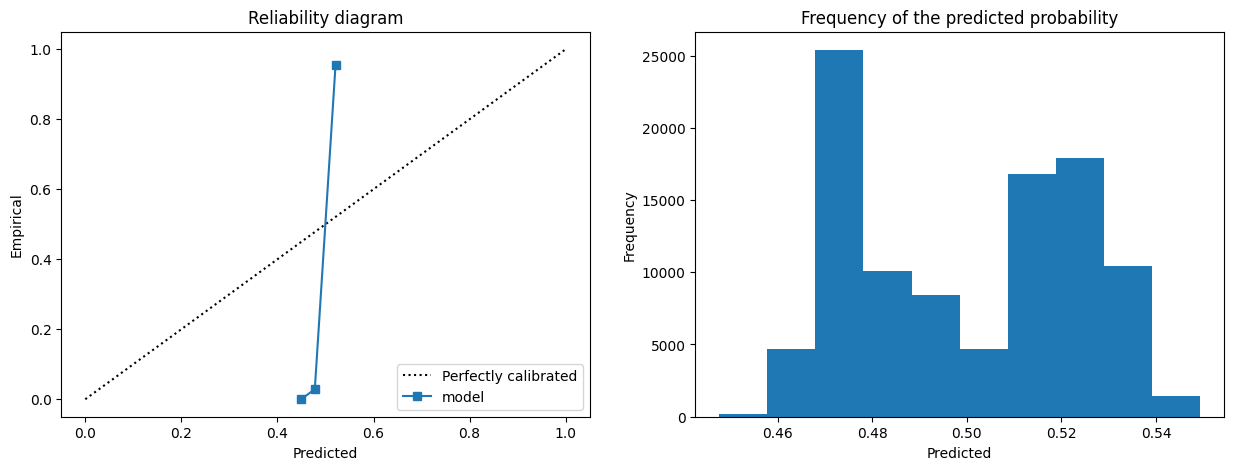

In [5]:
plot_reliability_diagram(y, cls.base_model.predict_proba(X)[:, 1])

## After applying calibration

0.00805170437738165

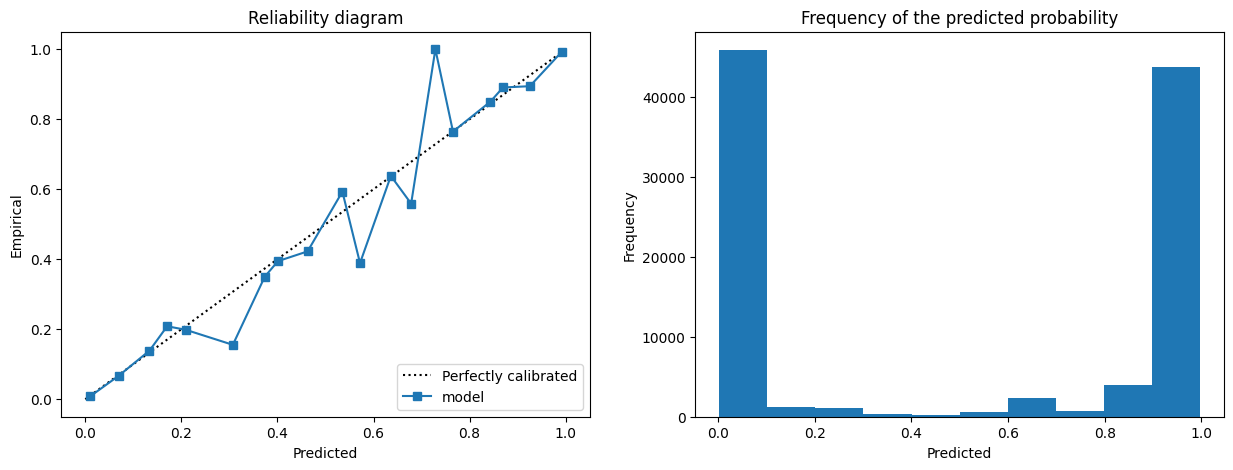

In [6]:
plot_reliability_diagram(y, cls.predict_proba(X)[:, 1])